In [1]:
import pandas as pd
import json
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
colnames=['tweets', 'created_at', 'id', 'rt', 'lang', 'urls', 'Event']
df = pd.read_csv('clean_relevant_tweets.csv', header='infer')

In [3]:
df_timewindow4 = pd.read_csv('temp23_4.csv',header='infer',engine='python')
df_timewindow5 = pd.read_csv('temp23_5.csv',header='infer',engine='python')
df_timewindow6 = pd.read_csv('temp23_6.csv',header='infer',engine='python')
df_timewindow7 = pd.read_csv('temp23_7.csv',header='infer',engine='python')
df_timewindow8 = pd.read_csv('temp23_8.csv',header='infer',engine='python')
df_timewindow9 = pd.read_csv('temp23_9.csv',header='infer',engine='python')

In [4]:
list_timestamp4 = df_timewindow4.Timestamp.unique().tolist()
list_timestamp5 = df_timewindow5.Timestamp.unique().tolist()
list_timestamp6 = df_timewindow6.Timestamp.unique().tolist()
list_timestamp7 = df_timewindow7.Timestamp.unique().tolist()
list_timestamp8 = df_timewindow8.Timestamp.unique().tolist()
list_timestamp9 = df_timewindow9.Timestamp.unique().tolist()

In [5]:
def get_adjusted_rand_score(timestamp,df):
    dfchange = df.loc[df.Timestamp==timestamp]
    labels_true = dfchange.Event.tolist()
    labels_pred = dfchange.Cluster.tolist()
    return metrics.adjusted_rand_score(labels_true, labels_pred)


def get_adjusted_mutual_info_score(timestamp,df):
    dfchange = df.loc[df.Timestamp==timestamp]
    labels_true = dfchange.Event.tolist()
    labels_pred = dfchange.Cluster.tolist()
    return metrics.adjusted_mutual_info_score(labels_true, labels_pred)

def get_homogeneity_score(timestamp,df):
    dfchange = df.loc[df.Timestamp==timestamp]
    labels_true = dfchange.Event.tolist()
    labels_pred = dfchange.Cluster.tolist()
    return metrics.homogeneity_score(labels_true, labels_pred)

def get_completeness_score(timestamp,df):
    dfchange = df.loc[df.Timestamp==timestamp]
    labels_true = dfchange.Event.tolist()
    labels_pred = dfchange.Cluster.tolist()
    return metrics.completeness_score(labels_true, labels_pred)

def get_v_measure_score(timestamp,df):
    dfchange = df.loc[df.Timestamp==timestamp]
    labels_true = dfchange.Event.tolist()
    labels_pred = dfchange.Cluster.tolist()
    return metrics.v_measure_score(labels_true, labels_pred)

def get_fowlkes_mallows_score(timestamp,df):
    dfchange = df.loc[df.Timestamp==timestamp]
    labels_true = dfchange.Event.tolist()
    labels_pred = dfchange.Cluster.tolist()
    return metrics.fowlkes_mallows_score(labels_true, labels_pred)

In [6]:
def getAllMetrics(df,list_timestamp):
    df_evaluation = pd.DataFrame()
    df_evaluation['Timestamp'] = np.array([timestamp for timestamp in list_timestamp])
    df_evaluation['adjusted_rand_score'] = np.array([round(get_adjusted_rand_score(timestamp,df),1) for timestamp in list_timestamp])
    df_evaluation['adjusted_mutual_info_score'] = np.array([round(get_adjusted_mutual_info_score(timestamp,df),1) for timestamp in list_timestamp])
    df_evaluation['homogeneity_score'] = np.array([round(get_homogeneity_score(timestamp,df),1) for timestamp in list_timestamp])
    df_evaluation['completeness_score'] = np.array([round(get_completeness_score(timestamp,df),1) for timestamp in list_timestamp])
    df_evaluation['v_measure_score'] = np.array([round(get_v_measure_score(timestamp,df),1) for timestamp in list_timestamp])
    df_evaluation['fowlkes_mallows_score'] = np.array([round(get_fowlkes_mallows_score(timestamp,df),1) for timestamp in list_timestamp])
    df_evaluation['Number_Of_Clusters'] = np.array([df.loc[df['Timestamp']==timestamp].groupby(['Cluster']).count().shape[0] for timestamp in list_timestamp])
    return df_evaluation

In [7]:
df_evaluation_4 = getAllMetrics(df_timewindow4,list_timestamp4)
df_evaluation_5 = getAllMetrics(df_timewindow5,list_timestamp5)
df_evaluation_6 = getAllMetrics(df_timewindow6,list_timestamp6)
df_evaluation_7 = getAllMetrics(df_timewindow7,list_timestamp7)
df_evaluation_8 = getAllMetrics(df_timewindow8,list_timestamp8)
df_evaluation_9 = getAllMetrics(df_timewindow9,list_timestamp9)

In [8]:
list_predict_4 = df_timewindow4.Cluster.unique().tolist()
list_predict_5 = df_timewindow5.Cluster.unique().tolist()
list_predict_6 = df_timewindow6.Cluster.unique().tolist()
list_predict_7 = df_timewindow7.Cluster.unique().tolist()
list_predict_8 = df_timewindow8.Cluster.unique().tolist()
list_predict_9 = df_timewindow9.Cluster.unique().tolist()

In [9]:
def getLabel(list_event):
    try:
        temp = list_event.value_counts()
        return temp.keys()[0]
    except:
        return -1

In [10]:
def findPurity(temp_df):
    try:
        label = getLabel(temp_df['Event'])
        n1 = temp_df.loc[temp_df['Event']==label].shape[0]
        return n1
#         n2 = temp_df.shape[0]
#         return n1/n2
    except:
        return -1

In [11]:
def getDataframePurity(df,list_predict):
    df_purity = pd.DataFrame()
    df_purity['Cluster'] = np.array([cluster for cluster in list_predict])
#     print(df_purity['Cluster'])
    df_purity['Length_Cluster'] = [df.loc[df.Cluster==temp].shape[0] for temp in df_purity['Cluster']]
    df_purity['Predicted_Event'] = np.array([int(getLabel(df.loc[df['Cluster']==cluster]['Event'])) for cluster in list_predict])
    df_purity['Purity'] = np.array([round(findPurity(df.loc[df['Cluster']==cluster]),1) for cluster in list_predict])
    df_purity = df_purity.loc[df_purity.Length_Cluster!=1]
    return df_purity

In [12]:
def getTotalPurity(temp_df):
    sum = 0
    total_length = 0
    for i in range(temp_df.shape[0]):
        sum+= temp_df.iloc[i]['Purity']
        total_length+= temp_df.iloc[i]['Length_Cluster']
    return sum/total_length

In [13]:
df_purity_4 = getDataframePurity(df_timewindow4,list_predict_4)
df_purity_5 = getDataframePurity(df_timewindow5,list_predict_5)
df_purity_6 = getDataframePurity(df_timewindow6,list_predict_6)
df_purity_7 = getDataframePurity(df_timewindow7,list_predict_7)
df_purity_8 = getDataframePurity(df_timewindow8,list_predict_8)
df_purity_9 = getDataframePurity(df_timewindow9,list_predict_9)

In [14]:
total_purity_4 = getTotalPurity(df_purity_4)
total_purity_5 = getTotalPurity(df_purity_5)
total_purity_6 = getTotalPurity(df_purity_6)
total_purity_7 = getTotalPurity(df_purity_7)
total_purity_8 = getTotalPurity(df_purity_8)
total_purity_9 = getTotalPurity(df_purity_9)

In [15]:
predicted_events_4 = df_purity_4.Predicted_Event.unique().tolist()
print(len(predicted_events_4))
predicted_events_5 = df_purity_5.Predicted_Event.unique().tolist()
print(len(predicted_events_5))
predicted_events_6 = df_purity_6.Predicted_Event.unique().tolist()
print(len(predicted_events_6))
predicted_events_7 = df_purity_7.Predicted_Event.unique().tolist()
print(len(predicted_events_7))
predicted_events_8 = df_purity_8.Predicted_Event.unique().tolist()
print(len(predicted_events_8))
predicted_events_9 = df_purity_9.Predicted_Event.unique().tolist()
print(len(predicted_events_9))

219
244
259
279
295
329


In [16]:
all_events = df.Event.unique().tolist()
for i in range(len(all_events)):
    all_events[i] = {'Event':all_events[i],'Index':i}

In [17]:
def findIndex(all_events,temp):
    for i in range(len(all_events)):
        if(all_events[i]['Event']==temp):
            return all_events[i]['Index']
df_purity_4['Index_Event'] = [findIndex(all_events,temp) for temp in df_purity_4['Predicted_Event']]
df_purity_5['Index_Event'] = [findIndex(all_events,temp) for temp in df_purity_5['Predicted_Event']]
df_purity_6['Index_Event'] = [findIndex(all_events,temp) for temp in df_purity_6['Predicted_Event']]
df_purity_7['Index_Event'] = [findIndex(all_events,temp) for temp in df_purity_7['Predicted_Event']]
df_purity_8['Index_Event'] = [findIndex(all_events,temp) for temp in df_purity_8['Predicted_Event']]
df_purity_9['Index_Event'] = [findIndex(all_events,temp) for temp in df_purity_9['Predicted_Event']]

In [18]:
def findNotDetectEvents(df,length_events):
    new_df = df.loc[df.Predicted_Event!=-1]
    n_events = new_df.groupby(['Index_Event']).count().index.tolist()
    list_detection_1 = [False] * (length_events+1)
    for i in range(len(n_events)):
        list_detection_1[int(n_events[i])] = True
    not_detect_event_1 = []
    for i in range(len(list_detection_1)):
        if list_detection_1[i]==False:
            not_detect_event_1.append(i)
    return not_detect_event_1

In [19]:
def getScore(df,length_events):
    undetect_events = findNotDetectEvents(df,length_events)
    detect_events = 1- (len(undetect_events))/(length_events)
    return detect_events

In [20]:
score_4 = getScore(df_purity_4,len(all_events))
score_5 = getScore(df_purity_5,len(all_events))
score_6 = getScore(df_purity_6,len(all_events))
score_7 = getScore(df_purity_7,len(all_events))
score_8 = getScore(df_purity_8,len(all_events))
score_9 = getScore(df_purity_9,len(all_events))
print("Score:",score_4)
print("Score:",score_5)
print("Score:",score_6)
print("Score:",score_7)
print("Score:",score_8)
print("Score:",score_9)

Score: 0.6095505617977528
Score: 0.6797752808988764
Score: 0.7219101123595506
Score: 0.7780898876404494
Score: 0.8230337078651686
Score: 0.9185393258426966


# Clustering Metrics

In [21]:
def appendRowMean(df_evaluation,total_purity,score_detect,name):
    x_object = {'Name' : name , 
#                 'adjusted_rand_score' : df_evaluation['adjusted_rand_score'].mean(),
                'adjusted_mutual_info_score' : df_evaluation['adjusted_mutual_info_score'].mean(),
                'homogeneity_score' : df_evaluation['homogeneity_score'].mean(),
                'completeness_score':df_evaluation['completeness_score'].mean(),
#                 'v_measure_score':df_evaluation['v_measure_score'].mean(),
                'fowlkes_mallows_score':df_evaluation['fowlkes_mallows_score'].mean(),
                'Purity':total_purity,
                'Detected_Events':score_detect,
               }
    return x_object

In [22]:
# columns=['Name','adjusted_rand_score','adjusted_mutual_info_score','homogeneity_score','completeness_score','v_measure_score','fowlkes_mallows_score']
columns=['Name','adjusted_mutual_info_score','homogeneity_score','completeness_score','fowlkes_mallows_score']
df_mean_values = pd.DataFrame(columns=columns)
df_mean_values = df_mean_values.append(appendRowMean(df_evaluation_4,total_purity_4,score_4,'Time window 0.4'),ignore_index=True)
df_mean_values = df_mean_values.append(appendRowMean(df_evaluation_5,total_purity_5,score_5,'Time window 0.5'),ignore_index=True)
df_mean_values = df_mean_values.append(appendRowMean(df_evaluation_6,total_purity_6,score_6,'Time window 0.6'),ignore_index=True)
df_mean_values = df_mean_values.append(appendRowMean(df_evaluation_7,total_purity_7,score_7,'Time window 0.7'),ignore_index=True)
df_mean_values = df_mean_values.append(appendRowMean(df_evaluation_8,total_purity_8,score_8,'Time window 0.8'),ignore_index=True)
df_mean_values = df_mean_values.append(appendRowMean(df_evaluation_9,total_purity_9,score_9,'Time window 0.9'),ignore_index=True)
df_mean_values

,Name,adjusted_mutual_info_score,homogeneity_score,completeness_score,fowlkes_mallows_score,Detected_Events,Purity
0,Time window 0.4,0.827755,0.934966,0.884898,0.947211,0.609551,0.983712
1,Time window 0.5,0.807886,0.925411,0.868346,0.939759,0.679775,0.984304
2,Time window 0.6,0.793707,0.914966,0.860544,0.939966,0.721910,0.984284
3,Time window 0.7,0.767344,0.899344,0.840459,0.929115,0.778090,0.983971
4,Time window 0.8,0.737116,0.862389,0.833449,0.922547,0.823034,0.980706
5,Time window 0.9,0.591193,0.645794,0.893257,0.866220,0.918539,0.931567


In [23]:
df_mean_values = df_mean_values.rename(index={0:df_mean_values.Name[0],1:df_mean_values.Name[1],
                                              2:df_mean_values.Name[2],3:df_mean_values.Name[3],
                                              4:df_mean_values.Name[4],5:df_mean_values.Name[5]})

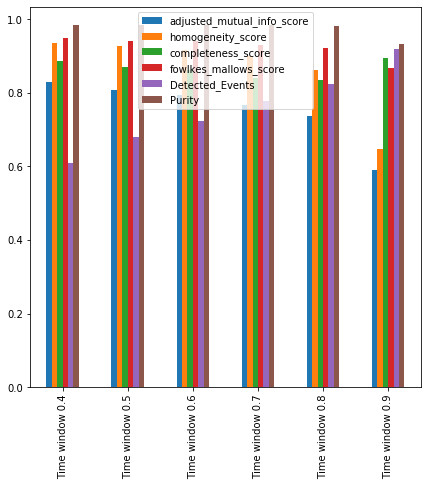

In [24]:
df_mean_values.plot(kind='bar',figsize=(7,7));

In [25]:
df_mean_values = df_mean_values.drop(['Name'], axis=1)
df_mean_values

,adjusted_mutual_info_score,homogeneity_score,completeness_score,fowlkes_mallows_score,Detected_Events,Purity
Time window 0.4,0.827755,0.934966,0.884898,0.947211,0.609551,0.983712
Time window 0.5,0.807886,0.925411,0.868346,0.939759,0.679775,0.984304
Time window 0.6,0.793707,0.914966,0.860544,0.939966,0.721910,0.984284
Time window 0.7,0.767344,0.899344,0.840459,0.929115,0.778090,0.983971
Time window 0.8,0.737116,0.862389,0.833449,0.922547,0.823034,0.980706
Time window 0.9,0.591193,0.645794,0.893257,0.866220,0.918539,0.931567


In [26]:
df_mean_values.to_csv("evaluationMeasures_2_3_grams.csv",index=True)